Importar Archivo con Pandas y unificar en un solo documento

In [3]:
#importaciones
import pandas as pd

# Ruta al archivo Excel
ruta_excel = r"online_retail_II.xlsx"

# Leer ambas hojas del archivo Excel y combinarlas en un solo DataFrame
try:
    hojas = pd.ExcelFile(ruta_excel).sheet_names  # Obtener nombres de las hojas
    dfs = [pd.read_excel(ruta_excel, sheet_name=hoja) for hoja in hojas]  # Leer cada hoja
    df = pd.concat(dfs, ignore_index=True)  # Combinar las hojas en un solo DataFrame
    print("Hojas combinadas correctamente:")
    print(df.head())


except Exception as e:
    print(f"Ocurrió un error al combinar las hojas: {e}")
#Estadísticas descriptivas
if 'df' in locals():
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

Hojas combinadas correctamente:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  

Estadísticas descriptivas:
          Invoice StockCode                         Description      Quantity  \
count   1067371.0   1067371                             1062989  1.067371e+06 

Análisis Descriptivo

In [4]:
# Análisis descriptivo
def analisis_descriptivo(df):
    print("Primeras filas del DataFrame:")
    print(df.head(), "\n")
    
    print("Información general del DataFrame:")
    print(df.info(), "\n")
    
    print("Estadísticas descriptivas:")
    print(df.describe(include='all'), "\n")
    
    print("Número de valores nulos por columna:")
    print(df.isnull().sum(), "\n")
    
    print("Número de valores únicos por columna:")
    print(df.nunique(), "\n")
    
    print("Tipos de datos:")
    print(df.dtypes, "\n")

    print("Número de valores duplicados por columna:")
    for col in df.columns:
        print(f"{col}: {df[col].duplicated().sum()}")
    
    print("Distribución de valores en las columnas categóricas:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nColumna: {col}")
        print(df[col].value_counts())
        print("Número de filas duplicadas:")
        print(df.duplicated().sum(), "\n")
        

# Llamar a la función de análisis descriptivo
analisis_descriptivo(df)

Primeras filas del DataFrame:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom   

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtyp

In [5]:
import pandas as pd

def limpiar_datos(df):
    """
    Función para limpiar datos que:
    1. Elimina filas duplicadas donde TODAS las columnas son iguales (conserva la primera)
    2. Reemplaza valores nulos en 'Customer ID' por 'Otros'
    3. Elimina filas con valores cero en 'Quantity' o 'Price'
    4. Calcula el campo 'TotalPrice'
    """
    # Hacer una copia del dataframe para no modificar el original
    df_limpio = df.copy()
    
    # 1. Eliminar duplicados exactos (todas las columnas iguales)
    df_limpio = df_limpio.drop_duplicates(keep='first')
    
    # 2. Rellenar Customer ID nulos con 'Otros'
    if 'Customer ID' in df_limpio.columns:
        df_limpio['Customer ID'] = df_limpio['Customer ID'].fillna('Otros')
    
    # 3. Eliminar filas con valores cero en Quantity o Price
    if 'Quantity' in df_limpio.columns:
        df_limpio = df_limpio[df_limpio['Quantity'] != 0]
    
    if 'Price' in df_limpio.columns:
        df_limpio = df_limpio[df_limpio['Price'] != 0]
    
    # 4. Calcular TotalPrice (si existen las columnas necesarias)
    if all(col in df_limpio.columns for col in ['Quantity', 'Price']):
        df_limpio['TotalPrice'] = df_limpio['Quantity'] * df_limpio['Price']
    
    return df_limpio

df_limpio = limpiar_datos(df)

# Guardar y mostrar información
df_limpio.to_excel("datos_limpios.xlsx", index=False)

Resultados y Estadísticas Descriptivas nuevo Data Frame

In [6]:
# Mostrar resultados
print("Información del DataFrame limpio:")
print(df_limpio.info())
print("\nPrimeras filas del DataFrame limpio:")
print(df_limpio.head())
# Llamar a la función de análisis descriptivo
analisis_descriptivo(df_limpio)

Información del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 1027022 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1027022 non-null  object        
 1   StockCode    1027022 non-null  object        
 2   Description  1027022 non-null  object        
 3   Quantity     1027022 non-null  int64         
 4   InvoiceDate  1027022 non-null  datetime64[ns]
 5   Price        1027022 non-null  float64       
 6   Customer ID  1027022 non-null  object        
 7   Country      1027022 non-null  object        
 8   TotalPrice   1027022 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 78.4+ MB
None

Primeras filas del DataFrame limpio:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P              

#Analizar la distribución de variables clave (por ejemplo, cantidad de
productos comprados, precio de los productos y fecha de compra).
#Identificar los productos más vendidos y visualizar sus tendencias de
ventas a lo largo del tiempo.
#Explorar los patrones estacionales en los datos de ventas e identificar los
períodos de máximas ventas.

C:\Users\Dc\AppData\Local\Temp\ipykernel_34508\3408214.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Ventas', y='Description', data=top_productos,
C:\Users\Dc\AppData\Local\Temp\ipykernel_34508\3408214.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Country', data=top_paises,
C:\Users\Dc\AppData\Local\Temp\ipykernel_34508\3408214.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia', y='TotalPrice', data=ventas_dia_semana,
C:\Users\Dc\AppData\Local\Temp\ipykernel_34508\3408214.py:105: FutureWarn

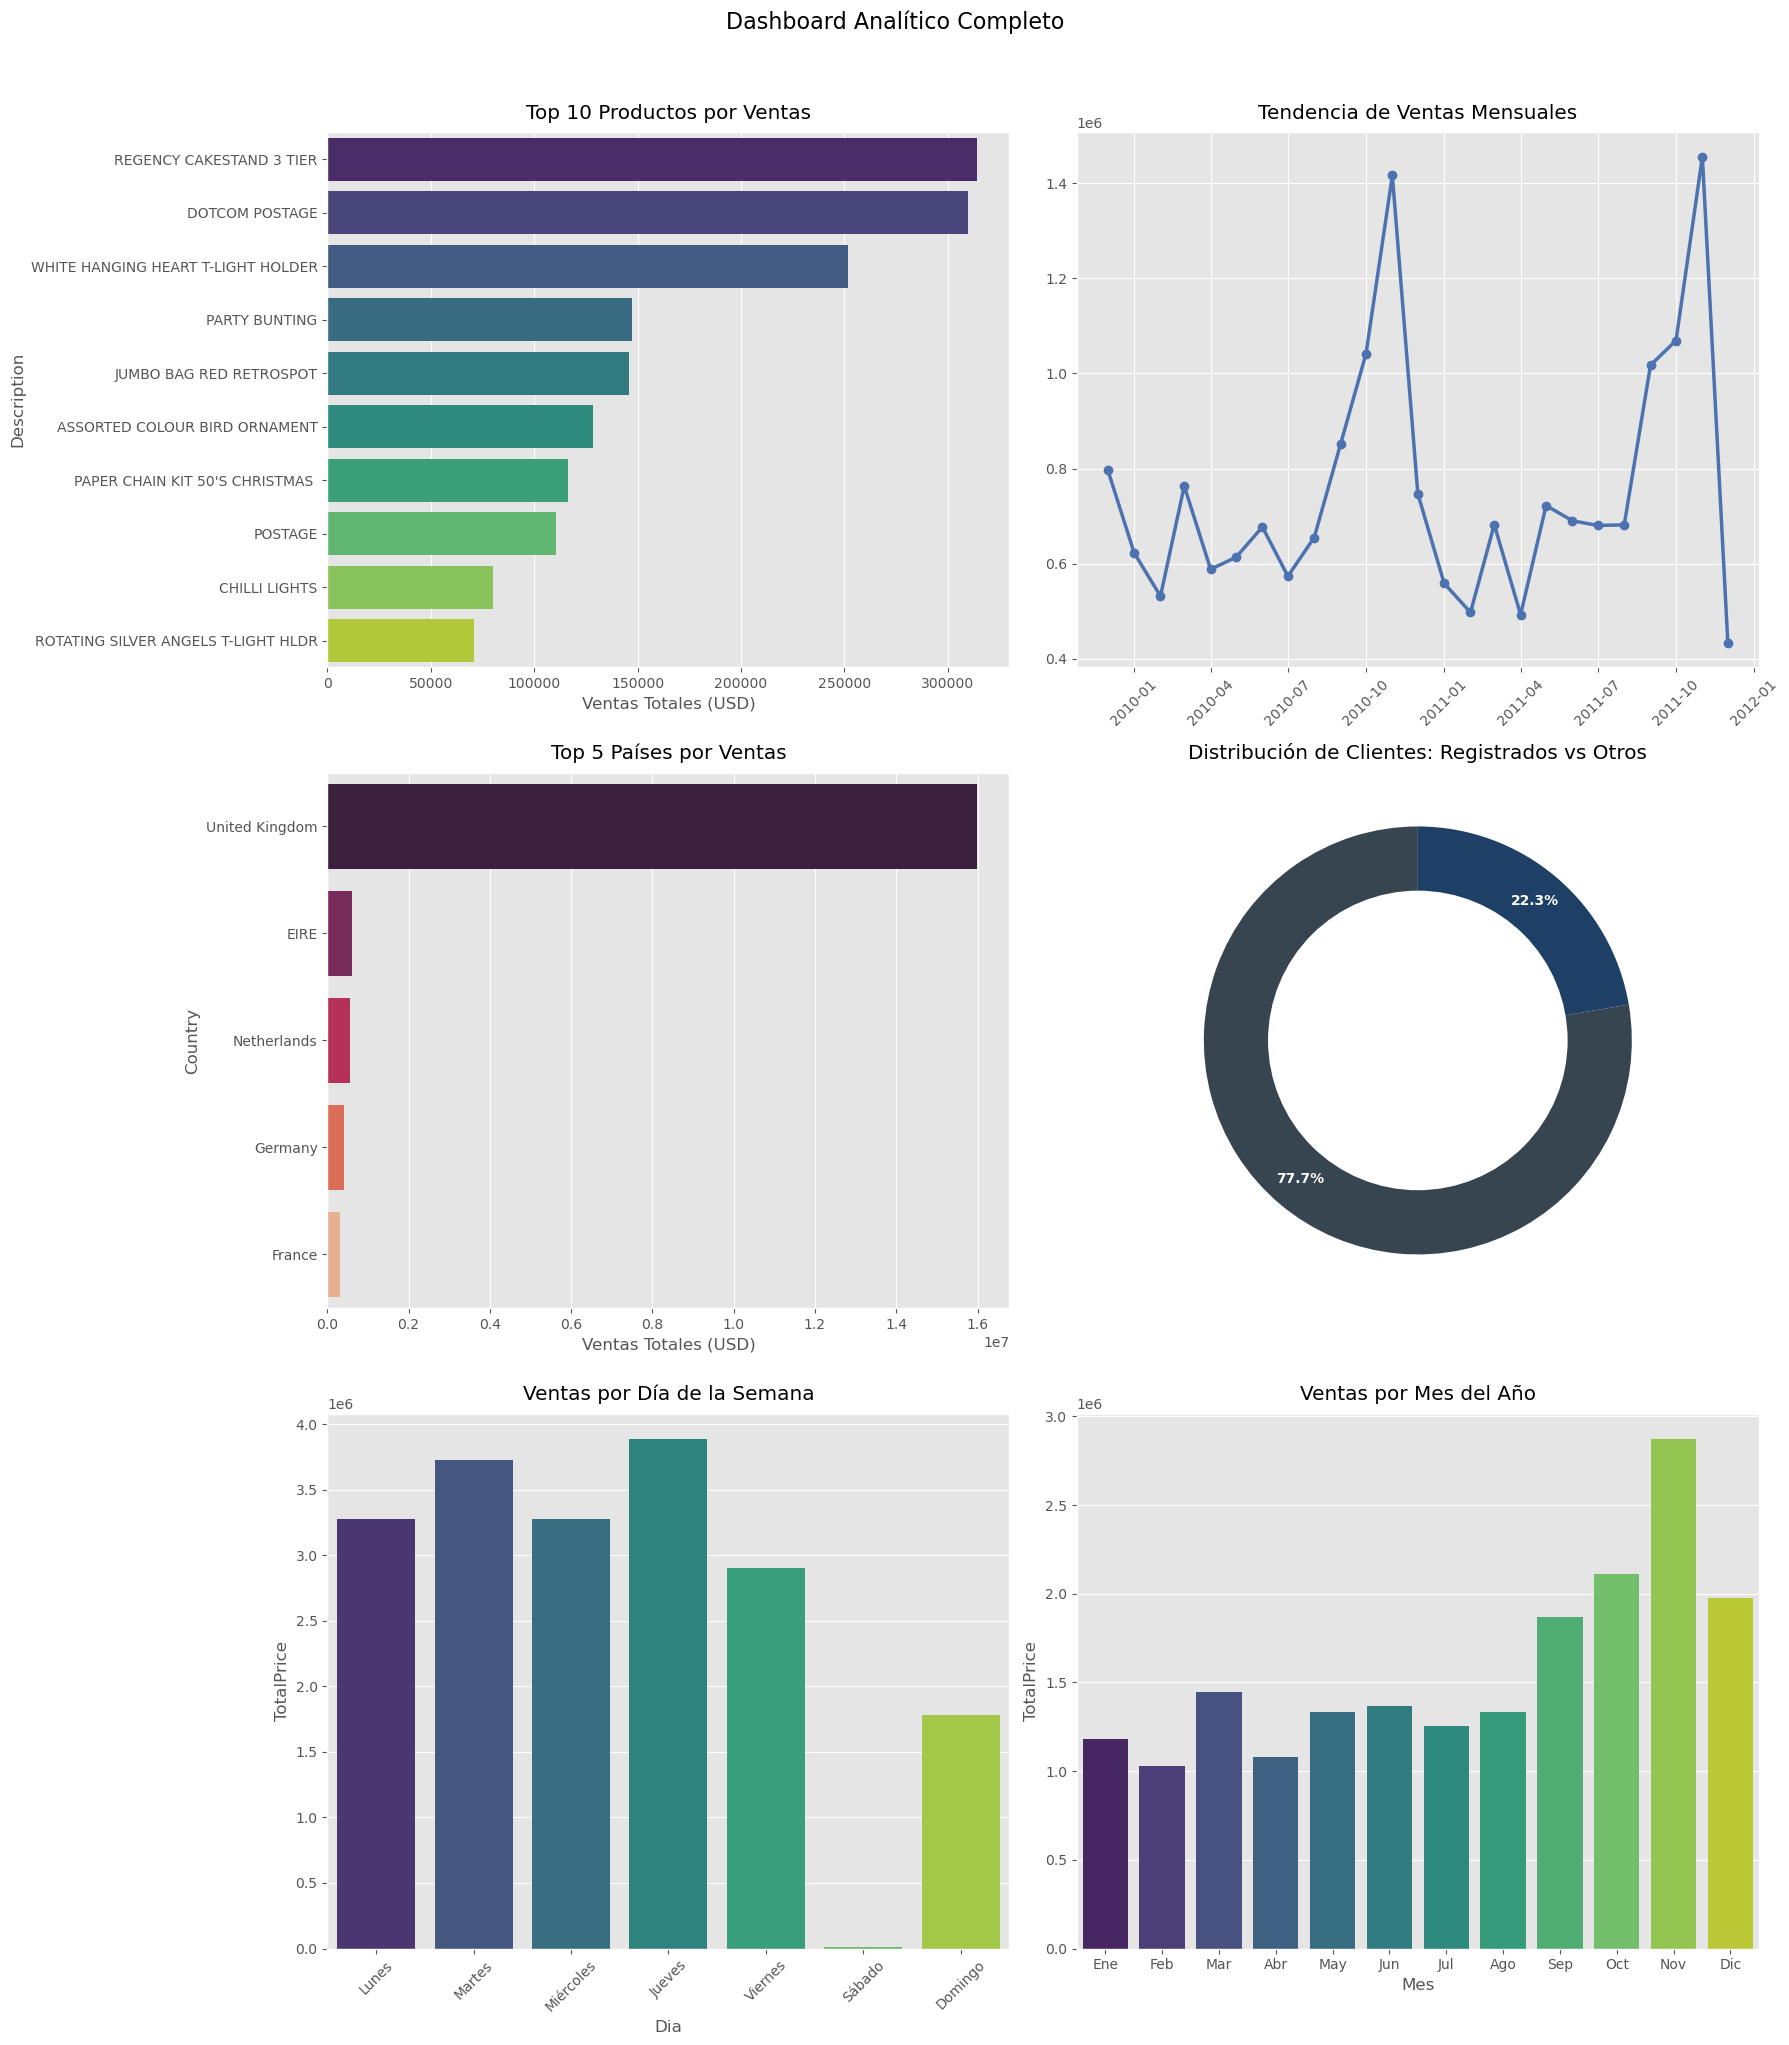

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Configuración
plt.style.use('ggplot')

# Crear figura con subplots (3x2)
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
fig.suptitle('Dashboard Analítico Completo', fontsize=16, y=1.02)

# ==============================================
# 1. Productos más vendidos
# ==============================================
top_productos = (df_limpio.groupby('Description', as_index=False)
                 .agg(Cantidad_Vendida=('Quantity', 'sum'),
                      Total_Ventas=('TotalPrice', 'sum'))
                 .sort_values(by='Total_Ventas', ascending=False)
                 .head(10))

ax1 = axes[0, 0]
sns.barplot(x='Total_Ventas', y='Description', data=top_productos, 
            palette='viridis', ax=ax1)
ax1.set_title('Top 10 Productos por Ventas', pad=10)
ax1.set_xlabel('Ventas Totales (USD)')

# ==============================================
# 2. Tendencias de ventas mensuales
# ==============================================
df_limpio['Mes'] = pd.to_datetime(df_limpio['InvoiceDate']).dt.to_period('M')
tendencia_mensual = (df_limpio.groupby('Mes', as_index=False)['TotalPrice']
                     .sum()
                     .sort_values(by='Mes'))
tendencia_mensual['Mes'] = tendencia_mensual['Mes'].dt.to_timestamp()

ax2 = axes[0, 1]
ax2.plot(tendencia_mensual['Mes'], tendencia_mensual['TotalPrice'], 
         marker='o', color='#4C72B0', linewidth=2.5)
ax2.set_title('Tendencia de Ventas Mensuales', pad=10)
ax2.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax2.tick_params(axis='x', rotation=45)

# ==============================================
# 3. Países con más ventas
# ==============================================
top_paises = (df_limpio.groupby('Country', as_index=False)['TotalPrice']
              .sum()
              .sort_values(by='TotalPrice', ascending=False)
              .head(5))

ax3 = axes[1, 0]
sns.barplot(x='TotalPrice', y='Country', data=top_paises, 
            palette='rocket', ax=ax3)
ax3.set_title('Top 5 Países por Ventas', pad=10)
ax3.set_xlabel('Ventas Totales (USD)')

# ==============================================
# 4. Distribución de clientes
# ==============================================
df_limpio['TipoCliente'] = df_limpio['Customer ID'].fillna('Otros').apply(
    lambda x: 'Otros' if x == 'Otros' else 'Registrados'
)
clientes = (df_limpio['TipoCliente'].value_counts(normalize=True)
            .reset_index())
clientes.columns = ['TipoCliente', 'Porcentaje']

ax4 = axes[1, 1]
colors = ['#36454F', '#1E3F66']
ax4.pie(clientes['Porcentaje'], labels=clientes['TipoCliente'], 
        autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'width': 0.4}, pctdistance=0.85,
        textprops={'color': 'white', 'fontweight': 'bold'})
ax4.set_title('Distribución de Clientes: Registrados vs Otros', pad=10)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax4.add_artist(centre_circle)

# ==============================================
# 5. Ventas por día de la semana
# ==============================================
df_limpio['DiaSemana'] = pd.to_datetime(df_limpio['InvoiceDate']).dt.dayofweek
ventas_dia_semana = (df_limpio.groupby('DiaSemana', as_index=False)['TotalPrice']
                     .sum()
                     .sort_values(by='DiaSemana'))
ventas_dia_semana['Dia'] = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 
                            'Viernes', 'Sábado', 'Domingo']

ax5 = axes[2, 0]
sns.barplot(x='Dia', y='TotalPrice', data=ventas_dia_semana, 
            order=ventas_dia_semana['Dia'], palette='viridis', ax=ax5)
ax5.set_title('Ventas por Día de la Semana', pad=10)
ax5.tick_params(axis='x', rotation=45)

# ==============================================
# 6. Ventas por mes del año
# ==============================================
df_limpio['MesNum'] = pd.to_datetime(df_limpio['InvoiceDate']).dt.month
ventas_mes_anio = (df_limpio.groupby('MesNum', as_index=False)['TotalPrice']
                   .sum()
                   .sort_values(by='MesNum'))
ventas_mes_anio['Mes'] = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

ax6 = axes[2, 1]
sns.barplot(x='Mes', y='TotalPrice', data=ventas_mes_anio, 
            order=ventas_mes_anio['Mes'], palette='viridis', ax=ax6)
ax6.set_title('Ventas por Mes del Año', pad=10)

# Ajustes finales
plt.tight_layout()
plt.savefig('dashboard_completo.png', dpi=300, bbox_inches='tight')
plt.show()


Definir una nueva columna en los datos para trabajar con dos clases: “Clientes
Normales” y “Clientes Premium”.

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  TotalPrice      Mes  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom        83.4  2009-12   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom        81.0  2009-12   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom        81.0  2009-12   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom       100.8  2009-12   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom        30.0  2009-12   

   TipoCliente  DiaSemana  MesNum       Categoria  
0  Registrados          1      12  Clien

C:\Users\Dc\AppData\Local\Temp\ipykernel_34508\3183558531.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='viridis')


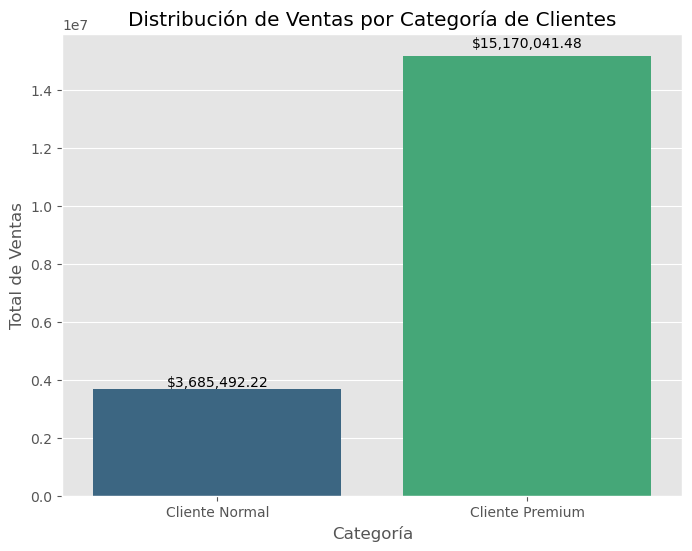

In [8]:
# Crear una copia del DataFrame limpio para trabajar
df_clasificacion = df_limpio.copy()

# Calcular el total gastado por cada cliente
clientes_agrupados = df_clasificacion.groupby('Customer ID')['TotalPrice'].sum().reset_index()

# Definir el umbral para "Clientes Premium" (percentil 80 del gasto total)
umbral_premium = clientes_agrupados['TotalPrice'].quantile(0.8)

# Crear una nueva columna para clasificar a los clientes
clientes_agrupados['Categoria'] = clientes_agrupados['TotalPrice'].apply(
    lambda x: 'Cliente Premium' if x >= umbral_premium else 'Cliente Normal'
)

# Unir esta clasificación con el DataFrame original
df_clasificacion = df_clasificacion.merge(
    clientes_agrupados[['Customer ID', 'Categoria']], 
    on='Customer ID', 
    how='left'
)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_clasificacion.head())

# Contar el número de clientes en cada categoría
conteo_categorias = df_clasificacion['Categoria'].value_counts()

# Mostrar el conteo distintivo de clientes únicos por categoría
conteo_clientes_unicos = clientes_agrupados['Categoria'].value_counts()
print("Conteo distintivo de clientes únicos por categoría:")
print(conteo_clientes_unicos)

# Calcular la sumatoria del total de ventas por categoría
ventas_por_categoria = clientes_agrupados.groupby('Categoria')['TotalPrice'].sum()
print("\nSumatoria del total de ventas por categoría:")
print(ventas_por_categoria)

# Graficar la distribución de clientes por categoría
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='viridis')
plt.title('Distribución de Ventas por Categoría de Clientes')
plt.xlabel('Categoría')
plt.ylabel('Total de Ventas')

# Incluir el monto de ventas en las columnas
for i, total in enumerate(ventas_por_categoria.values):
    plt.text(i, total + (total * 0.02), f"${total:,.2f}", ha='center', fontsize=10, color='black')

plt.show()




#Análisis Clientes Alto Valor

Reporte de clasificación:
                 precision    recall  f1-score   support

 Cliente Normal       1.00      1.00      1.00      1426
Cliente Premium       1.00      1.00      1.00       356

       accuracy                           1.00      1782
      macro avg       1.00      1.00      1.00      1782
   weighted avg       1.00      1.00      1.00      1782



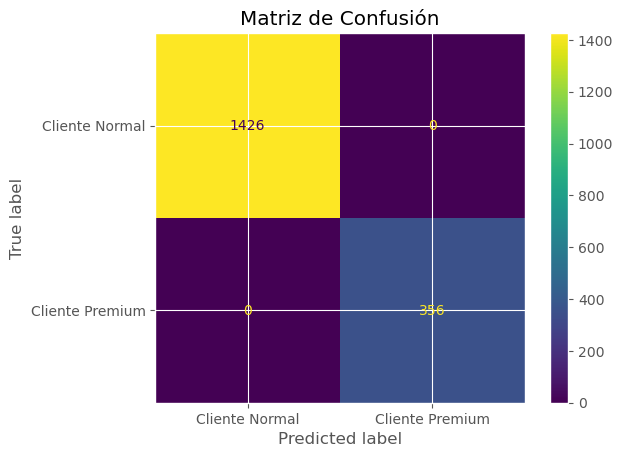

C:\Users\Dc\AppData\Local\Temp\ipykernel_34508\1630244620.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_importancia, palette='viridis')


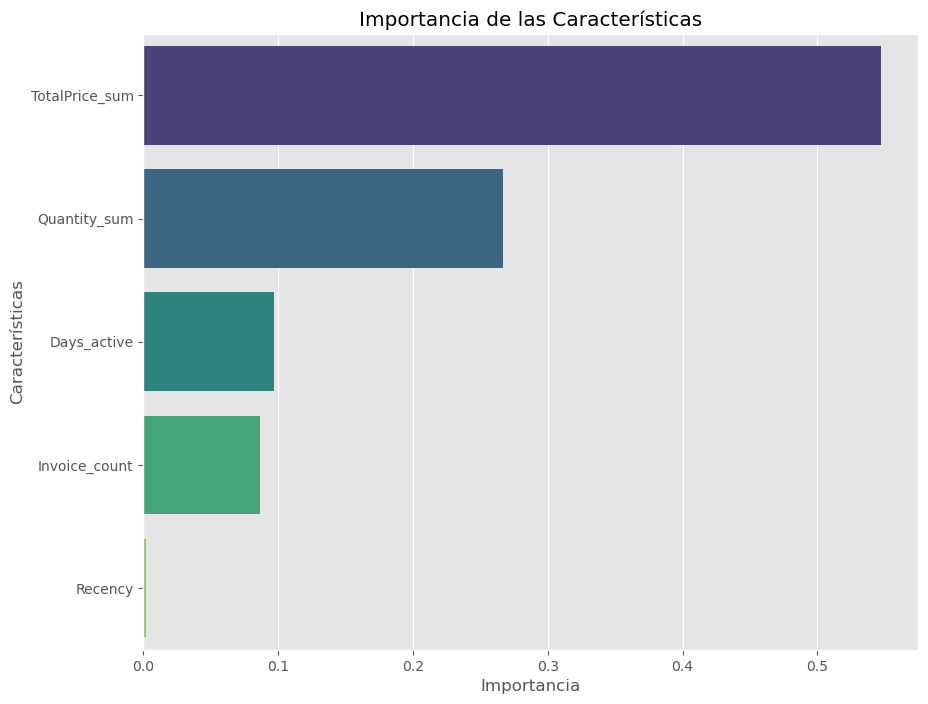

Estadísticas descriptivas de las características seleccionadas:
       TotalPrice_sum   Quantity_sum  Invoice_count  Days_active      Recency
count    5.940000e+03    5940.000000    5940.000000  5940.000000  5940.000000
mean     3.174332e+03    1806.116835       8.143771     8.065488   202.750842
std      3.595586e+04   12290.585598      48.094765    45.328595   211.725821
min     -2.511109e+04   -1085.000000       1.000000     1.000000     1.000000
25%      3.213975e+02     177.000000       2.000000     2.000000    25.000000
50%      8.239050e+02     462.000000       4.000000     4.000000    96.000000
75%      2.144240e+03    1311.000000       8.000000     8.000000   381.000000
max      2.565542e+06  687358.000000    3504.000000  3281.000000   739.000000

Distribución de las etiquetas:
Categoria
Cliente Normal     4752
Cliente Premium    1188
Name: count, dtype: int64
Análisis descriptivo por tipo de cliente:
                TotalPrice_sum                                              

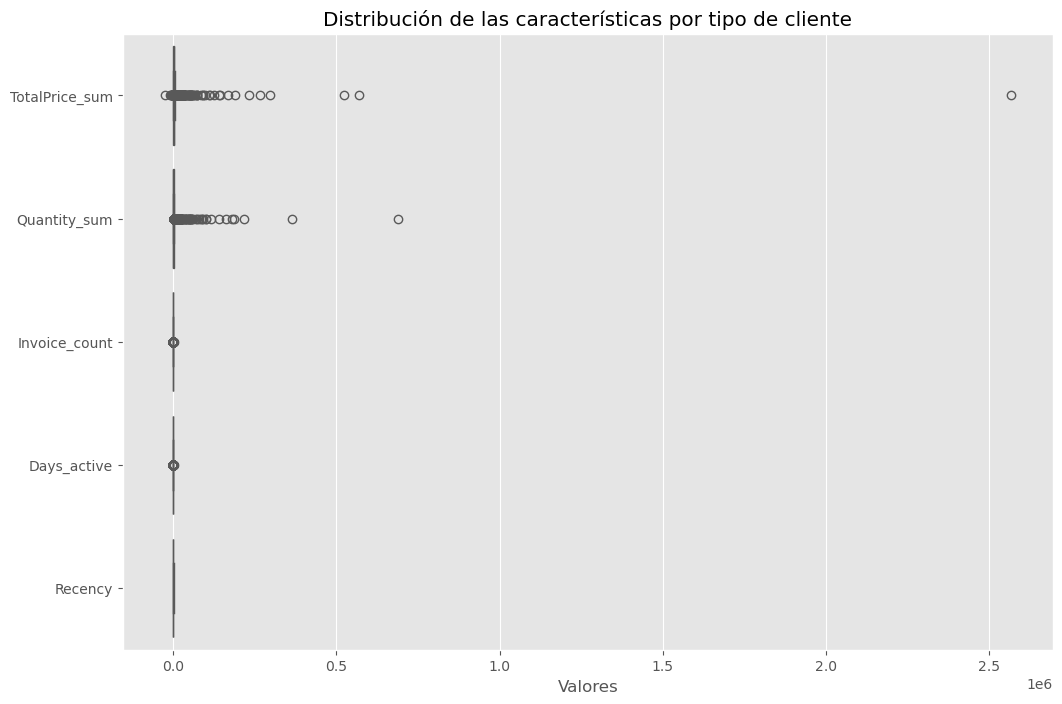

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del DataFrame limpio
df_modelo = df_clasificacion

# Seleccionar características relevantes basadas en la importancia calculada
X = df_modelo.groupby('Customer ID').agg(
    TotalPrice_sum=('TotalPrice', 'sum'),
    Quantity_sum=('Quantity', 'sum'),
    Invoice_count=('Invoice', 'nunique'),
    Days_active=('InvoiceDate', 'nunique'),
    Recency=('InvoiceDate', lambda x: (pd.Timestamp('2011-12-10 12:50:00') - x.max()).days)
).reset_index()

# Agregar la categoría de cliente
X = X.merge(clientes_agrupados[['Customer ID', 'Categoria']], on='Customer ID', how='left')

# Separar características (X) y etiquetas (y)
X_features = X.drop(columns=['Customer ID', 'Categoria'])
y = X['Categoria']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar el modelo de clasificación
modelo = RandomForestClassifier(class_weight='balanced', random_state=42)
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap='viridis')
plt.title("Matriz de Confusión")
plt.show()

# Importancia de las características
importancias = modelo.feature_importances_
features_importancia = pd.DataFrame({
    'Feature': X_features.columns,
    'Importance': importancias
}).sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_importancia, palette='viridis')
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


# Imprimir estadísticas descriptivas de las características seleccionadas
print("Estadísticas descriptivas de las características seleccionadas:")
print(X_features.describe())

# Imprimir estadísticas descriptivas de las etiquetas
print("\nDistribución de las etiquetas:")
print(y.value_counts())

# Análisis descriptivo por tipo de cliente
print("Análisis descriptivo por tipo de cliente:")
descriptivo_por_tipo = X.groupby(y).describe().round(2)
print(descriptivo_por_tipo)

# Análisis descriptivo por características
print("\nAnálisis descriptivo por características:")
descriptivo_por_caracteristicas = X_features.describe().round(2)
print(descriptivo_por_caracteristicas)

# Visualización de distribución por tipo de cliente
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_features, orient="h", palette="Set2")
plt.title("Distribución de las características por tipo de cliente")
plt.xlabel("Valores")
plt.show()

#1. Definición de categorías de clientes

Agrupamiento_KMeans Categorización Clientes

c:\Users\Dc\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dc\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


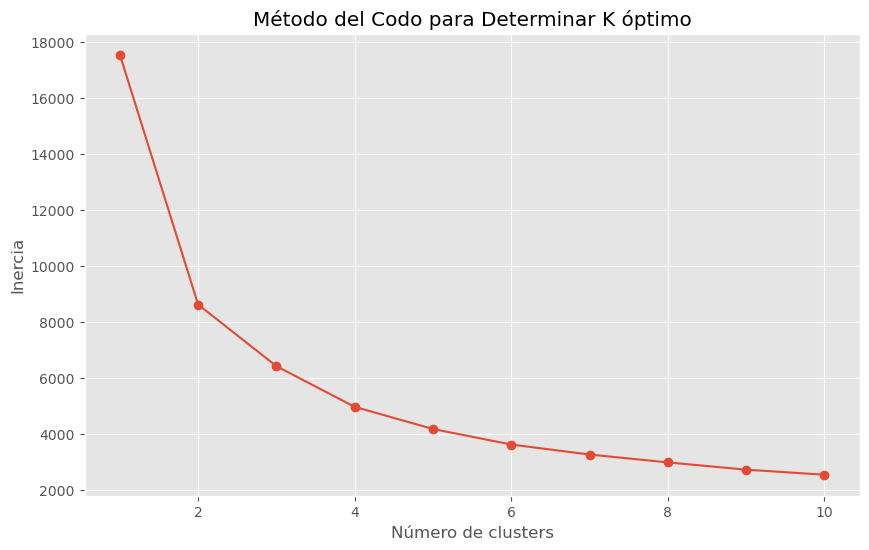

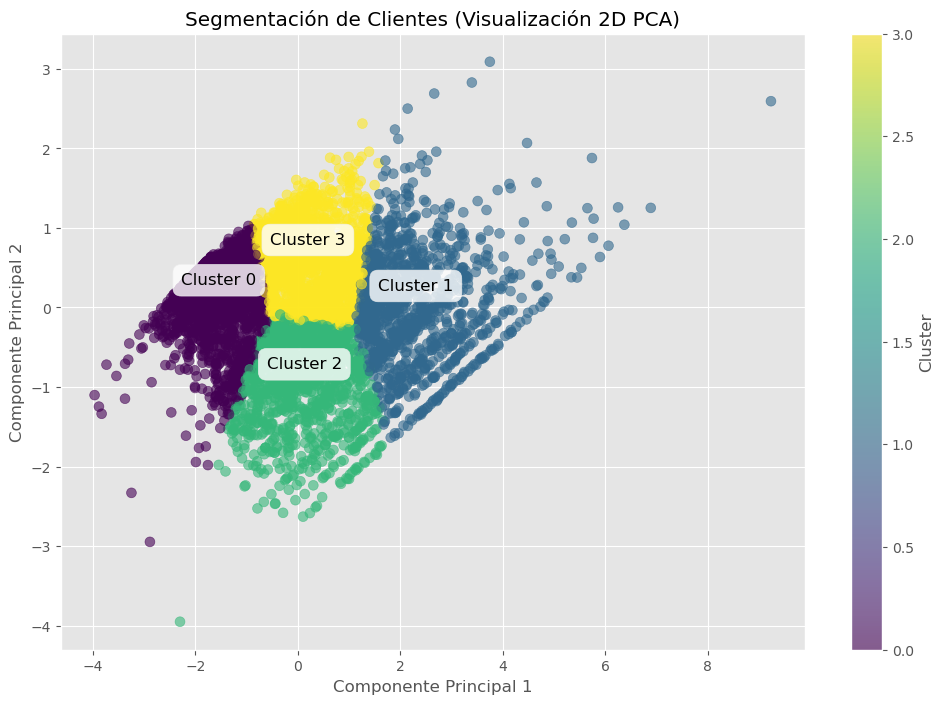

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

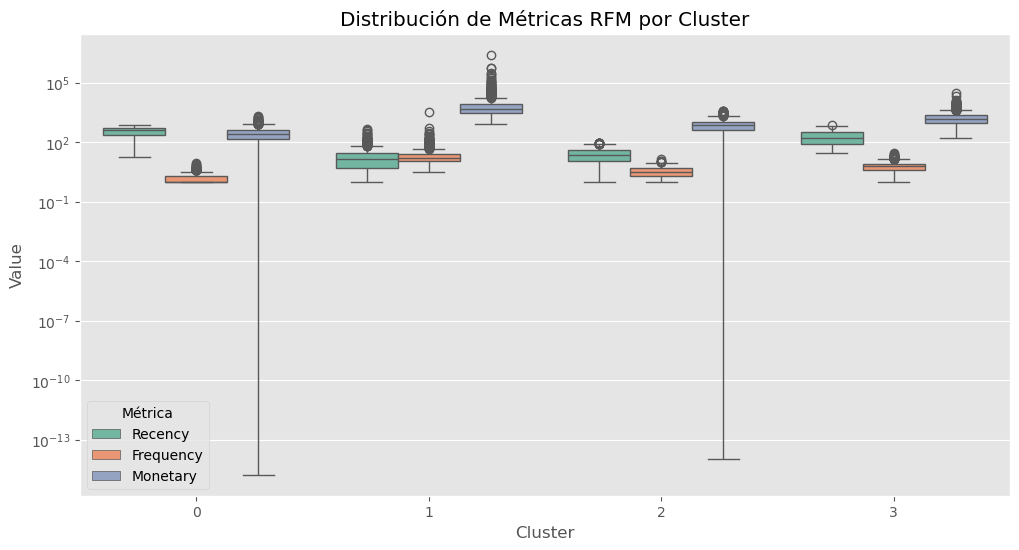

Estadísticas por cluster:
        Recency        Frequency         Monetary          Customer ID
           mean median      mean median      mean   median       count
Cluster                                                               
0        390.31  397.0      1.58    1.0    321.53   269.21        1989
1         23.93   15.0     27.34   17.0  12723.85  5005.73        1139
2         26.94   23.0      3.49    3.0    832.47   715.21        1243
3        214.75  169.0      6.49    6.0   1888.26  1466.41        1473

Cluster 0: Clientes Inactivos (Alta recencia, baja frecuencia y gasto)
       Recency  Frequency  Monetary
count  1989.00    1989.00   1989.00
mean    390.31       1.58    321.53
std     188.87       0.87    234.56
min      18.00       1.00      0.00
25%     243.00       1.00    154.21
50%     397.00       1.00    269.21
75%     540.00       2.00    420.50
max     739.00       9.00   2135.46

Cluster 1: Clientes Leales (Baja recencia, alta frecuencia)
       Recency  Freq

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Preparación de datos RFM
df = df_limpio.copy()
df = df[df['Customer ID'] != 'otros'].dropna(subset=['Customer ID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalPrice': 'Monetary'
}).reset_index()

rfm = rfm[rfm['Monetary'] > 0]

# 2. Transformación y escalado
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# 3. Determinar número óptimo de clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo para Determinar K óptimo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

# 4. Aplicar K-means (k=4 como ejemplo)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 5. Reducción a 2D con PCA para visualización
pca = PCA(n_components=2)
rfm_2d = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_2d[:, 0]
rfm['PCA2'] = rfm_2d[:, 1]

# 6. Visualización 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    rfm['PCA1'], 
    rfm['PCA2'], 
    c=rfm['Cluster'], 
    cmap='viridis',
    alpha=0.6,
    s=50
)
# Asignar nombres a los clusters basados en su posición
cluster_positions = rfm.groupby('Cluster')[['PCA1', 'PCA2']].mean()

for cluster, (x, y) in cluster_positions.iterrows():
    plt.annotate(
        f'Cluster {cluster}',
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=12,
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8)
    )

plt.title('Segmentación de Clientes (Visualización 2D PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# 7. Gráfico de barras por características
rfm_melted = rfm.melt(
    id_vars=['Cluster'], 
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Cluster',
    y='Value',
    hue='Metric',
    data=rfm_melted,
    palette='Set2'
)
plt.title('Distribución de Métricas RFM por Cluster')
plt.yscale('log')
plt.legend(title='Métrica')
plt.show()

# 8. Interpretación de clusters
cluster_stats = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'Customer ID': 'count'
}).round(2)

print("Estadísticas por cluster:")
print(cluster_stats)

# Sugerir nombres para los clusters
cluster_names = {
    0: 'Clientes Inactivos (Alta recencia, baja frecuencia y gasto)',
    1: 'Clientes Leales (Baja recencia, alta frecuencia)',
    2: 'Clientes en Riesgo (Recencia media, frecuencia media)',
    3: 'Clientes Premium (Baja recencia, alto gasto)'
}
#
for cluster in range(k):
    print(f"\nCluster {cluster}: {cluster_names.get(cluster, 'Por analizar')}")
    print(rfm[rfm['Cluster'] == cluster][['Recency', 'Frequency', 'Monetary']].describe().round(2))
    #

Agrupamiento_Mean_Shift Categorización Clientes

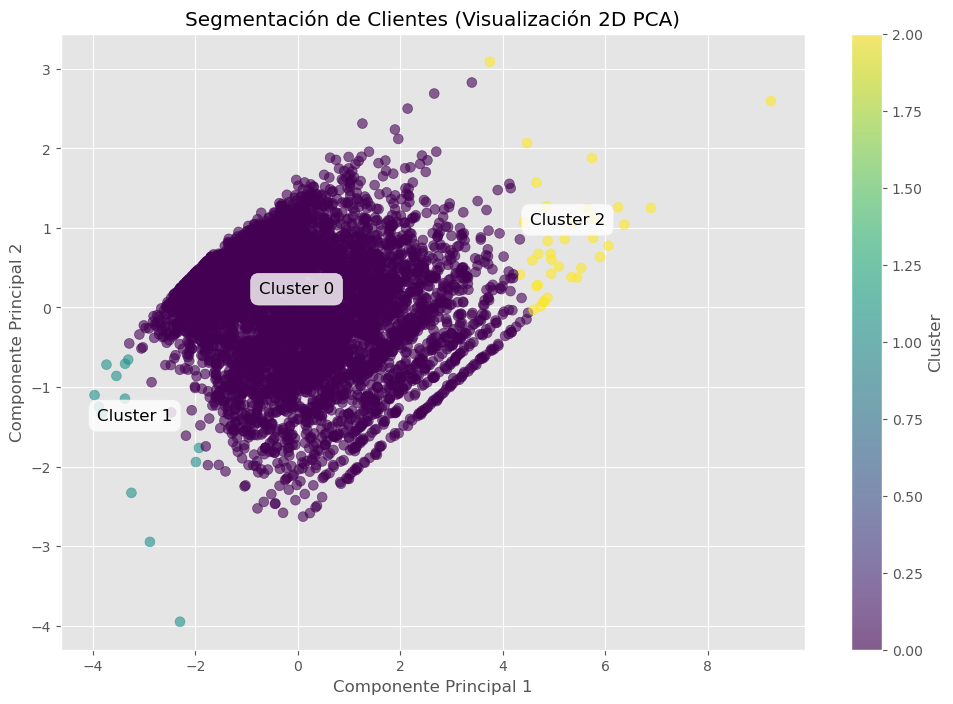

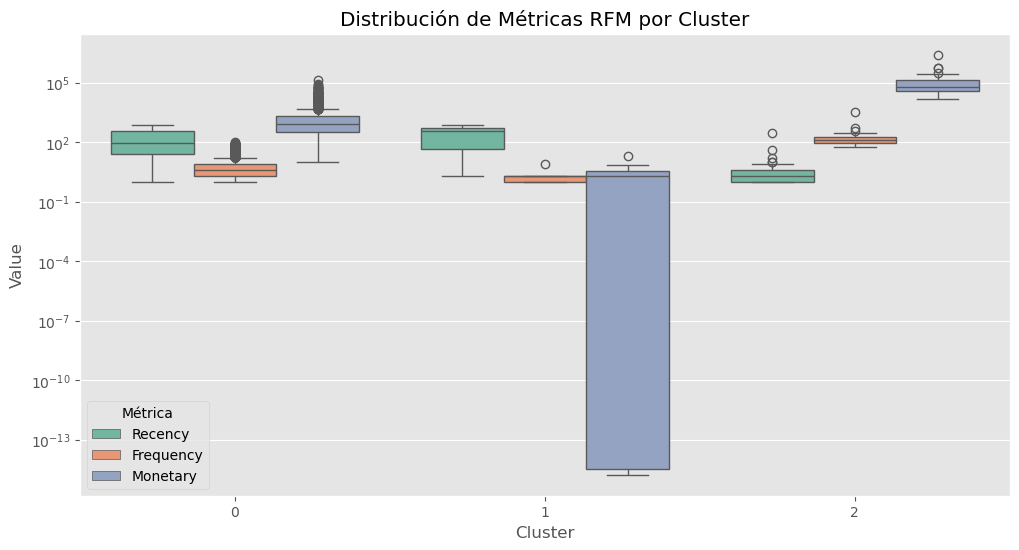

Estadísticas por cluster:
        Recency        Frequency          Monetary           Customer ID
           mean median      mean median       mean    median       count
Cluster                                                                 
0        198.21   93.5      6.80    4.0    2158.98    842.02        5796
1        316.69  366.0      2.00    2.0       3.61      1.90          13
2         12.77    2.0    248.91  129.0  183848.35  59379.94          35


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Preparación de datos RFM
df = df_limpio.copy()
df = df[df['Customer ID'] != 'otros'].dropna(subset=['Customer ID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalPrice': 'Monetary'
}).reset_index()

rfm = rfm[rfm['Monetary'] > 0]

# 2. Transformación y escalado
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# 3. Aplicar Mean Shift
mean_shift = MeanShift()
rfm['Cluster'] = mean_shift.fit_predict(rfm_scaled)

# 4. Reducción a 2D con PCA para visualización
pca = PCA(n_components=2)
rfm_2d = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_2d[:, 0]
rfm['PCA2'] = rfm_2d[:, 1]

# 5. Visualización 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    rfm['PCA1'], 
    rfm['PCA2'], 
    c=rfm['Cluster'], 
    cmap='viridis',
    alpha=0.6,
    s=50
)
# Asignar nombres a los clusters basados en su posición
cluster_positions = rfm.groupby('Cluster')[['PCA1', 'PCA2']].mean()

for cluster, (x, y) in cluster_positions.iterrows():
    plt.annotate(
        f'Cluster {cluster}',
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=12,
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8)
    )

plt.title('Segmentación de Clientes (Visualización 2D PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# 6. Gráfico de barras por características
rfm_melted = rfm.melt(
    id_vars=['Cluster'], 
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Cluster',
    y='Value',
    hue='Metric',
    data=rfm_melted,
    palette='Set2'
)
plt.title('Distribución de Métricas RFM por Cluster')
plt.yscale('log')
plt.legend(title='Métrica')
plt.show()

# 7. Interpretación de clusters
cluster_stats = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'Customer ID': 'count'
}).round(2)

print("Estadísticas por cluster:")
print(cluster_stats)


In [ ]:
#Predicción de ventas .

In [ ]:
# Mostrar las variables activas
%whos
#

Variable                          Type                      Data/Info
---------------------------------------------------------------------
ConfusionMatrixDisplay            type                      <class 'sklearn.metrics._<...>.ConfusionMatrixDisplay'>
DateFormatter                     type                      <class 'matplotlib.dates.DateFormatter'>
KMeans                            ABCMeta                   <class 'sklearn.cluster._kmeans.KMeans'>
MeanShift                         type                      <class 'sklearn.cluster._mean_shift.MeanShift'>
PCA                               ABCMeta                   <class 'sklearn.decomposition._pca.PCA'>
RandomForestClassifier            ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
StandardScaler                    type                      <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                                 DataFrame                      Customer ID  TotalPr<...>\n[5940 row